![alt text](https://i.imgur.com/1WaY7aA.png)

# Lab 4.1.1.1 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns

from scipy import stats
from matplotlib import pyplot as plt

sns.set_context("poster")
sns.set(rc={'figure.figsize': (10, 6)})
sns.set_style("whitegrid")

%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Find Dependent and Independent Variables to predict house price.

In [2]:
# Read CSV
house_csv = pd.read_csv( "C:\\Users\\praty\\Documents\\DSIA\\DSIA-SYD-FT-Projects-201907\\Sarita\\Labs\\Sacramentorealestatetransactions.csv")

In [3]:
house_csv.shape

(985, 12)

In [5]:
house_csv.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,95750.697462,2.911675,1.776650,1314.916751,234144.263959,38.607732,-121.355982
std,85.176072,1.307932,0.895371,853.048243,138365.839085,0.145433,0.138278
min,95603.000000,0.000000,0.000000,0.000000,1551.000000,38.241514,-121.551704
25%,95660.000000,2.000000,1.000000,952.000000,145000.000000,38.482717,-121.446127
50%,95762.000000,3.000000,2.000000,1304.000000,213750.000000,38.626582,-121.376220
75%,95828.000000,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.295778
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.020808,-120.597599


In [10]:
house_csv.describe().T # this is a transpose of the above

,count,mean,std,min,25%,50%,75%,max
beds,985.0,2.911675,1.307932,0.000000,2.000000,3.000000,4.000000,8.000000
baths,985.0,1.776650,0.895371,0.000000,1.000000,2.000000,2.000000,5.000000
sq__ft,985.0,1314.916751,853.048243,0.000000,952.000000,1304.000000,1718.000000,5822.000000
price,985.0,234144.263959,138365.839085,1551.000000,145000.000000,213750.000000,300000.000000,884790.000000
latitude,985.0,38.607732,0.145433,38.241514,38.482717,38.626582,38.695589,39.020808
longitude,985.0,-121.355982,0.138278,-121.551704,-121.446127,-121.376220,-121.295778,-120.597599


In [6]:
house_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
street       985 non-null object
city         985 non-null object
zip          985 non-null int64
state        985 non-null object
beds         985 non-null int64
baths        985 non-null int64
sq__ft       985 non-null int64
type         985 non-null object
sale_date    985 non-null object
price        985 non-null int64
latitude     985 non-null float64
longitude    985 non-null float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.4+ KB


In [7]:
# Zip is categorical value, should be string
house_csv['zip'] = house_csv['zip'].astype(str)

In [8]:
house_csv['zip'].head()

0    95838
1    95823
2    95815
3    95815
4    95824
Name: zip, dtype: object

In [11]:
house_csv[house_csv['beds'] == 0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
73,17 SERASPI CT,SACRAMENTO,95834,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,206000,38.631481,-121.501880
89,2866 KARITSA AVE,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,244500,38.626671,-121.525970
100,12209 CONSERVANCY WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,263500,38.553867,-121.219141
121,5337 DUSTY ROSE WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,320000,38.528575,-121.228600
126,2115 SMOKESTACK WAY,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,339500,38.602416,-121.542965
133,8082 LINDA ISLE LN,SACRAMENTO,95831,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,370000,38.477200,-121.521500
147,9278 DAIRY CT,ELK GROVE,95624,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,445000,38.420338,-121.363757
153,868 HILDEBRAND CIR,FOLSOM,95630,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,585000,38.670947,-121.097727
169,14788 NATCHEZ CT,RANCHO MURIETA,95683,CA,0,0,0,Residential,Tue May 20 00:00:00 EDT 2008,97750,38.492287,-121.100032
192,5201 LAGUNA OAKS DR Unit 126,ELK GROVE,95758,CA,0,0,0,Condo,Tue May 20 00:00:00 EDT 2008,145000,38.423251,-121.444489


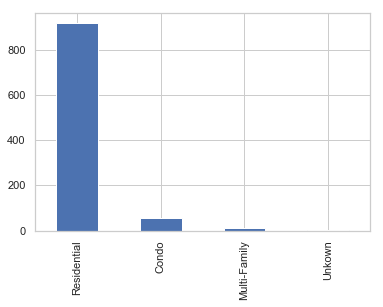

In [12]:
# Types of Data
house_csv['type'].value_counts().plot(kind='bar')

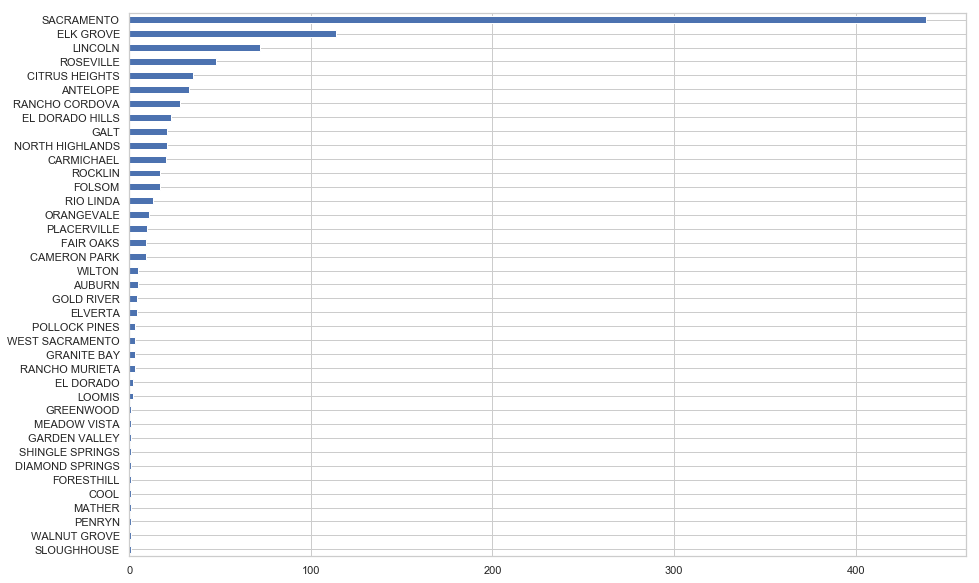

In [13]:
# City
house_csv['city'].value_counts().sort_values().plot(kind='barh', figsize=(15,10));

In [14]:
# Create another type which have 0 beds, baths, sqft
house_csv.loc[house_csv['beds'] == 0, 'type'] = 'Plot'

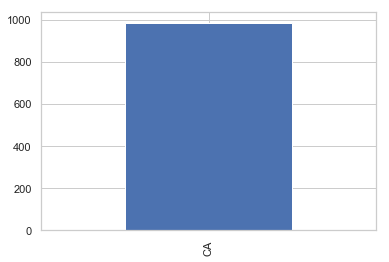

In [15]:
house_csv['state'].value_counts().plot(kind='bar');

In [16]:
# import the library
import folium
import pandas as pd

# Make an empty map
# 37.76, -122.45 is the initital location of SF, USA
m = folium.Map(location=[38.575764, -121.478851], tiles="Mapbox Bright", zoom_start=10)

# I can add circle/marker one by one on the map
for i in range(0, len(house_csv.head(1000))):
    folium.Marker(
        location=[house_csv.iloc[i]['latitude'], house_csv.iloc[i]['longitude']]
    ).add_to(m)
    
display(m)

### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

In [62]:
# ANSWER, Price is the target varaible

#### 2.2 List all possible variables which might be Independent/Predictor variable.

In [17]:
# ANSWER
house_csv.columns

Index(['street', 'city', 'zip', 'state', 'beds', 'baths', 'sq__ft', 'type',
       'sale_date', 'price', 'latitude', 'longitude'],
      dtype='object')

In [ ]:
#'beds', 'baths', 'sq__ft', 'type' atre the important features

In [18]:
# Target Variable
Y = house_csv['price']

In [19]:
# Predictor Variable
X = house_csv['beds']

In [20]:
def draw_scatter_plot(X, Y):
    ### Plot the data
    # create a figure
    fig = plt.figure(figsize=(15,7))
    # get the axis of that figure
    ax = plt.gca()

    # plot a scatter plot on it with our data
    ax.scatter(X, Y, c='b')

    plt.show();

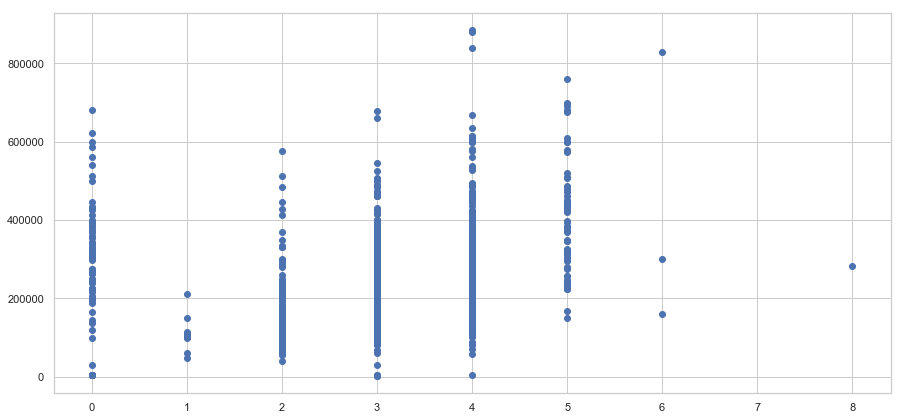

In [21]:
# beds
draw_scatter_plot(house_csv['beds'], house_csv['price'])

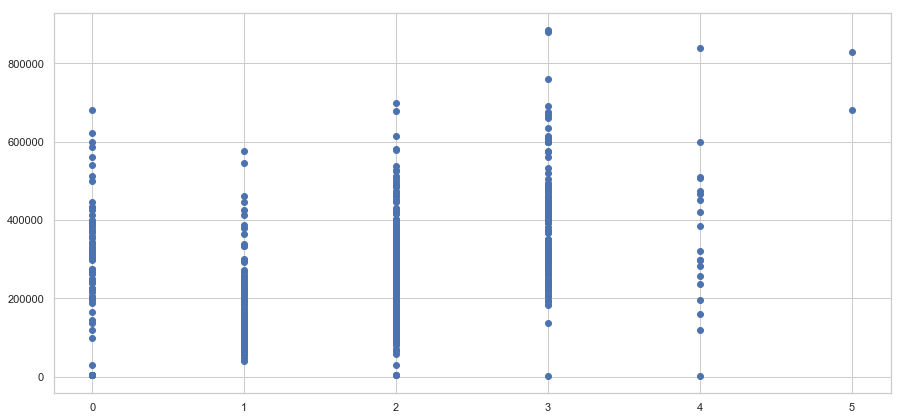

In [22]:
# beds
draw_scatter_plot(house_csv['baths'], house_csv['price'])

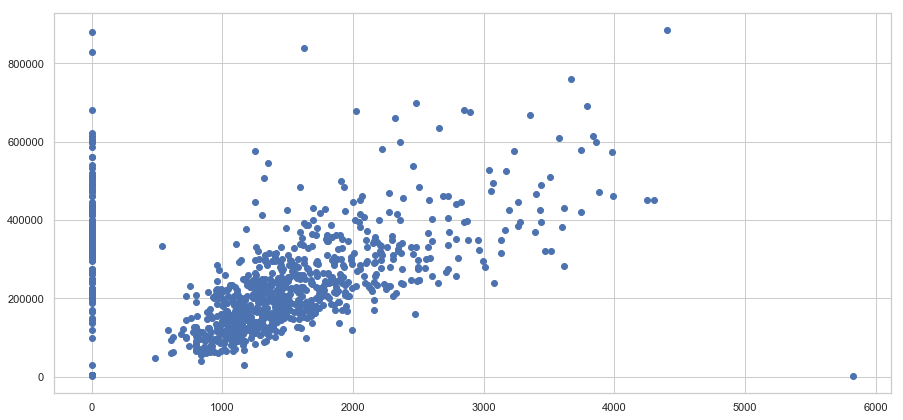

In [23]:
# beds
draw_scatter_plot(house_csv['sq__ft'], house_csv['price'])

#### 2.2 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [24]:
# ANSWER
# ANSWER
house_csv.corr()

,beds,baths,sq__ft,price,latitude,longitude
beds,1.000000,0.839650,0.684041,0.342024,-0.291307,-0.053993
baths,0.839650,1.000000,0.665690,0.416208,-0.235792,0.016582
sq__ft,0.684041,0.665690,1.000000,0.333897,-0.383274,-0.177742
price,0.342024,0.416208,0.333897,1.000000,-0.039573,0.284485
latitude,-0.291307,-0.235792,-0.383274,-0.039573,1.000000,0.387925
longitude,-0.053993,0.016582,-0.177742,0.284485,0.387925,1.000000


#### 2.3 Find Coefficient and Intercept using Linear Regression

Using LinearRegression of sklearn.linear_model package find Coefficient and Intercept.

Create an instance of LinearRegression.

Explore following methods:

- fit
- predict
- score

In [25]:
from sklearn.linear_model import LinearRegression

##### 2.3.1 Fit predictor and target variables using linear regression 

In [27]:
# ANSWER

X = house_csv['sq__ft'].values.reshape(-1,1)
Y = house_csv['price']
linreg = LinearRegression()
linreg.fit(X, Y)

print(linreg.coef_, linreg.intercept_)

[54.15863969] 162930.16140699777


##### 2.3.2 Find R Score

Find $R^2$ Using ```score``` method of Linear Regression.

In [28]:
# ANSWER
linreg.score(X, Y)

0.11148717682951437

### 3. Splitting Data

In [29]:
from sklearn.model_selection import train_test_split

#### 3.1 Create training and testing subsets

Hint: Using `train_test_split` Library.

```
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
```

In [71]:
# ANSWER
## Create training and testing subsets

In [30]:
## Create training and testing subsets

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

#### 3.2 Check Shape, Sample of Test Train Data

In [31]:
# ANSWER
## Check training/test data

# About training
print('X_train is a %s' % type(X_train))
print('X_train has %d rows', X_train.shape)
print('')
print('Sample of X_train%s' % ('_'*50))
print(X_train[:10])

print('')
print('y_train is a %s' % type(y_train))
print('y_train has %d rows', y_train.shape)
print('')
print('Sample of y_train%s' % ('_'*50))
print(y_train[:10])

X_train is a <class 'numpy.ndarray'>
X_train has %d rows (788, 1)

Sample of X_train__________________________________________________
[[1520]
 [2295]
 [1477]
 [2155]
 [   0]
 [1356]
 [   0]
 [ 960]
 [1351]
 [2592]]

y_train is a <class 'pandas.core.series.Series'>
y_train has %d rows (788,)

Sample of y_train__________________________________________________
408    170000
817    360000
931    176850
504    340000
970    224000
19     121630
326    541000
644    155000
395    158000
781    303000
Name: price, dtype: int64


#### 3.3 Using Linear Regression Find The Score

1. Fit model using X_train, y_train
2. Find score using x_test, y_test

In [32]:
# ANSWER
# ANSWER

linreg = LinearRegression()
linreg.fit(X_train, y_train)

print(linreg.coef_, linreg.intercept_)

[48.46103777] 170544.82291178076


In [33]:
# ANSWER
linreg.score(X_test, y_test)

0.18751589904449906

### 3. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house using linear regression model.**

In [34]:
# ANSWER
linreg.intercept_, linreg.coef_

(170544.82291178076, array([48.46103777]))

In [35]:
# ANSWER
beta0 = linreg.intercept_
beta1 = linreg.coef_
x = 1204

Ypred = beta1 * x + beta0
print('Predicted house price: ', Ypred[0])

Predicted house price:  228891.91239157168


In [36]:
# ANSWER
x = [[1204]]
Ypred = linreg.predict(x)
print('Predicted house price: ', Ypred[0])

Predicted house price:  228891.91239157168
